In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


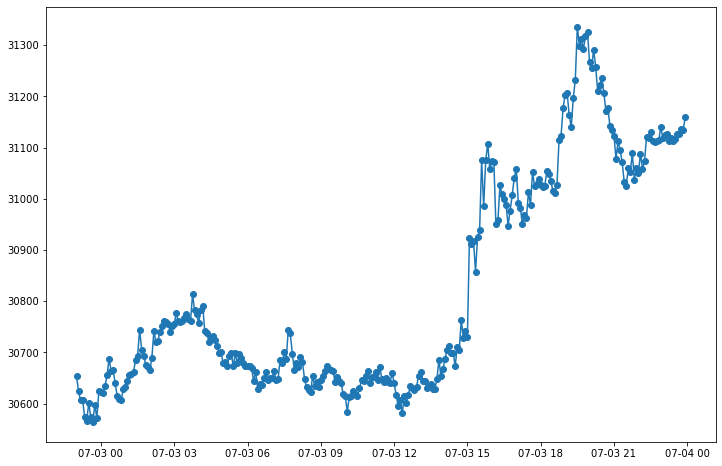

In [9]:
data = data[['open']]
plt.figure(figsize=(12, 8))
plt.plot(data[-300:], marker='o', label='open')
plt.show()

In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import gamma
from collections import defaultdict
from random import choice, random, randint

In [11]:
def kth_element(arr, l: int, r: int, k: int):
    if r - l == 1:
        return arr[l]
    pivot = choice(arr[l: r])
    lq = l
    rq = r - 1
    while lq <= rq:
        if arr[lq] <= pivot:
            lq += 1
        else:
            arr[lq], arr[rq] = arr[rq], arr[lq]
            rq -= 1
    print(l, r, pivot, k)
    if k < lq - l:
        return kth_element(arr, l, lq, k)
    return kth_element(arr, lq, r, k - (lq - l))

def get_kth_element(arr, k):
    k = min(k, len(arr))
    # return kth_element(arr, 0, len(arr), k)
    return sorted(arr)[k]



<b>Functions for clusters and vectors</b>

In [12]:
def volume(r, m):
    return np.pi ** (m / 2) * r ** m / gamma(m / 2 + 1)



In [19]:
class Wishart: 
    radius: int
    horizon: int
    
    def __init__(self, r: int, u: int):
        self.radius = r
        self.horizon = u
        
    def significant(self, cluster, p):
        dif = [abs(p[i] - p[j]) for i in cluster for j in cluster]
        return max(dif) >= self.u
    
        
    def fit(self, x):
        n = len(x)
        m = len(x[0])
        dist = squareform(pdist(x))
        dr = []
        # print(dist)
        for i in range(n):
            dr.append(get_kth_element(dist[i], self.radius - 1))
        
        p = [self.radius / (volume(i, m) * n) for i in dr]
        label = 1
        w = np.full(n, 0)
        completed = {0: False}
        vertices = []
        for d, i in sorted(zip(dr, range(0, n))):
            neighbours = []
            neighbours_w = []
            clusters = defaultdict(list)
            for j in vertices:
                if dist[i][j] <= d:
                    neighbours.append(j)
                    neighbours_w.append(w[j])
                    clusters[w[j]].append(j)
            
            if len(neighbours) == 0:
                w[i] = label
                completed[label] = False
                label += 1
            else:
                if all([completed[l] for l in neighbours_w]):
                    w[i] = 0
                    continue
                else:
                    significant_clusters = set(wj for wj in neighbours_w if self.significant(clusters[wj], p))
                    if len(significant_clusters) > 1:
                        w[i] = 0
                        for wj in neighbours_w:
                            if wj in significant_clusters:
                                completed[wj] = (wj != 0)
                                continue
                            for v in clusters[wj]:
                                w[v] = 0
                    else:
                        if len(significant_clusters) == 1:
                            c1 = next(iter(significant_clusters))
                        else:
                            c1 = neighbours_w[0]
                        w[i] = c1
                        for wj in neighbours_w:
                            for v in clusters[wj]:
                                w[v] = c1

        return w

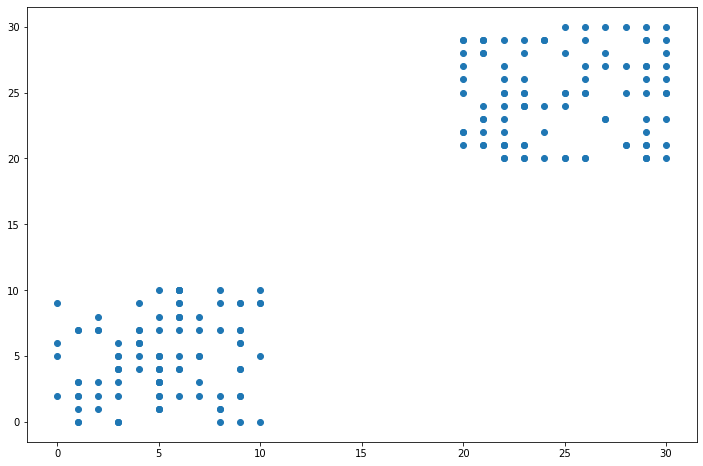

In [23]:
x = [randint(0, 10) for i in range(100)] + [randint(20, 30) for i in range(100)]
y = [randint(0, 10) for i in range(100)] + [randint(20, 30) for i in range(100)]

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.show()

[ 47  91   1   4   5  48  92  93   6 164  94   7  49   8   9 191 199 192
  50  10  11  51  52  53  54  95  55  12  96  13  14  15  97  98  16  99
  17 193 197 100  56  18  57 165 101 200  58  19  59  60 194 102 103 104
 105  20 166  61 106  62 107  21  22 108  23  63 109  24   2 110 111  64
 112 113 114  65  25 115 116 179  26  66  67 195  68 117   3 118 198 119
  27 120 121  28 122  69  70 123 124 125 126  29  71  30 127  31 128  32
  72 129  33 130  34 167 168  35 169  73 170 131  74  36  75 180 132 181
 133 171 134 135  76  77  78  37 196 172 136 182 137  79 138 139  38  80
  39  40  41  81 140  82 141 183  42  83 184  43 185 173  84 186 174 142
 175 143 144 145 187 146 147 148  85  86 149 188 150 151  44 152 153 154
 155 156  87  45 157 189 176 177 158  88 159 178 160 161 162  89 190  90
 163  46]


/tmp/ipykernel_16197/1229985736.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


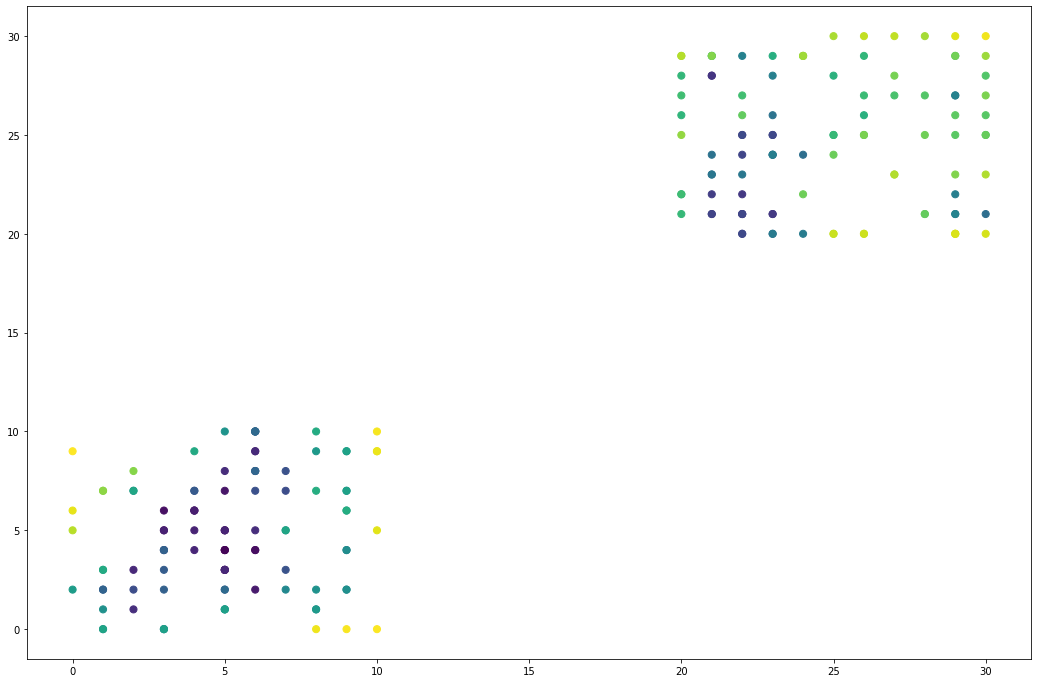

In [24]:
wishart = Wishart(11, 10)
# w = wishart.fit([[0, 1], [2, 3], [3, 5], [4, 2]])
w = wishart.fit(list(zip(x, y)))
# plt.figure(figsize=(12, 8))
print(w)
# plt.scatter(x, y, w)
# plt.text(x[0],y[0],w[0], ha="center", va="center")
# for i in range(2):
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=w,s=50)
#     plt.text(x[i],y[i],w[i], ha="center", va="center")
fig.show()